<a href="https://colab.research.google.com/github/steffiangel/Predictive-Analytics/blob/main/PA_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Water Quality prediction**

### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

Data import

In [ ]:
df=pd.read_csv("/content/waterQuality1.csv")

In [ ]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


**Descriptive analysis**

In [ ]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

### **Pre-Processing**

In [ ]:
cols_to_convert = ['ammonia', 'is_safe']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
#finding missing values
df.isnull().sum()

,0
aluminium,0
ammonia,3
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


Since there is very less number of missing values- dropping the null values.

In [ ]:
#dropping missing values
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


**Identifying outliers**

<Axes: >

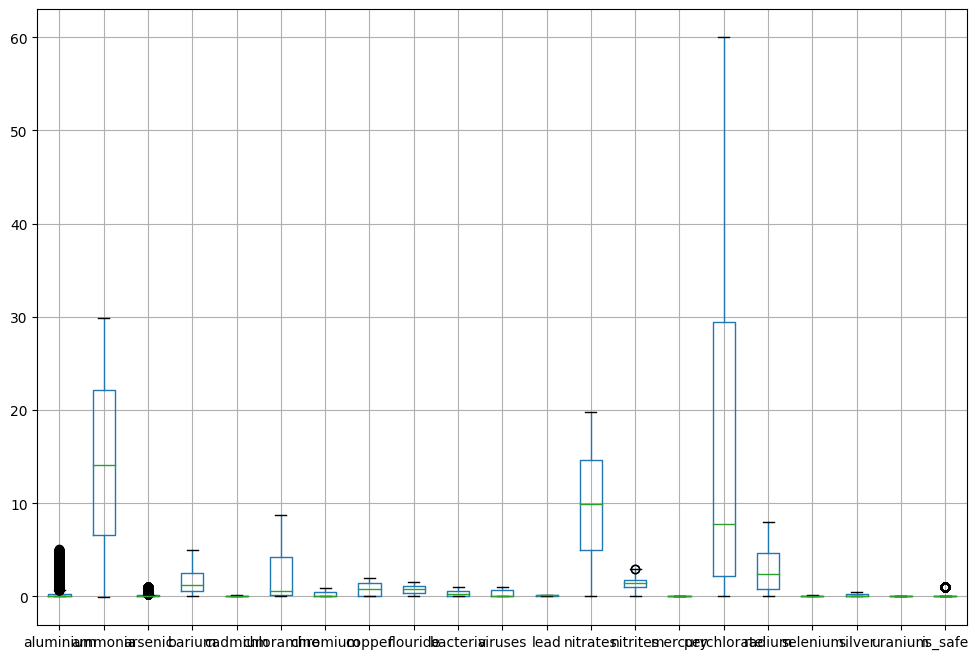

In [ ]:
plt.figure(figsize=(12, 8))
df.boxplot()

In [ ]:
def iqr_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[col].mean()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), mean_value, df[col])
    return df[col]

<Axes: >

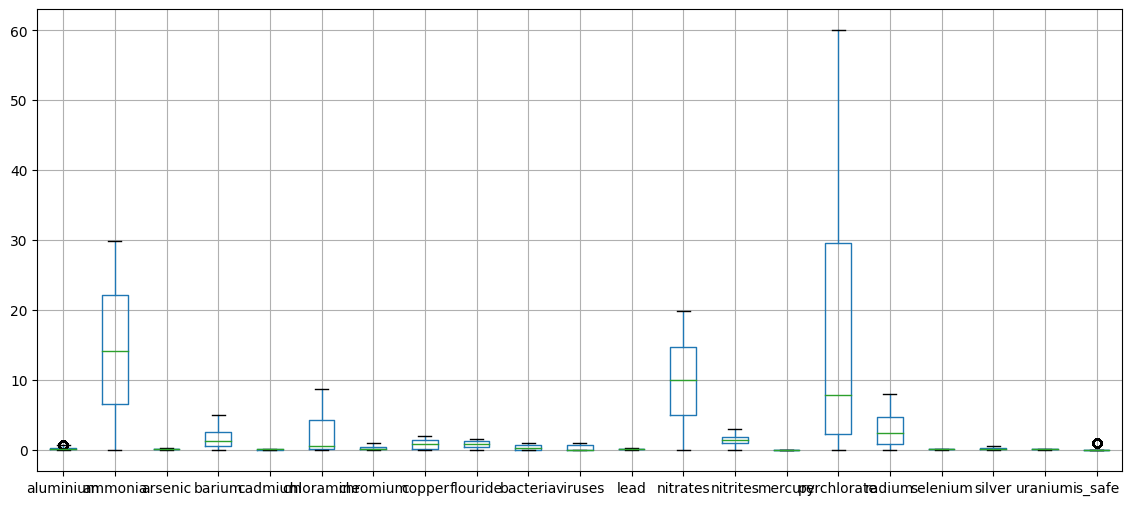

In [ ]:
columns_with_outliers = ['aluminium','nitrites','arsenic']
for column in columns_with_outliers:
    iqr_outliers(df, column)

plt.figure(figsize=(14, 6))
df.boxplot()

**Coorelation Analysis**

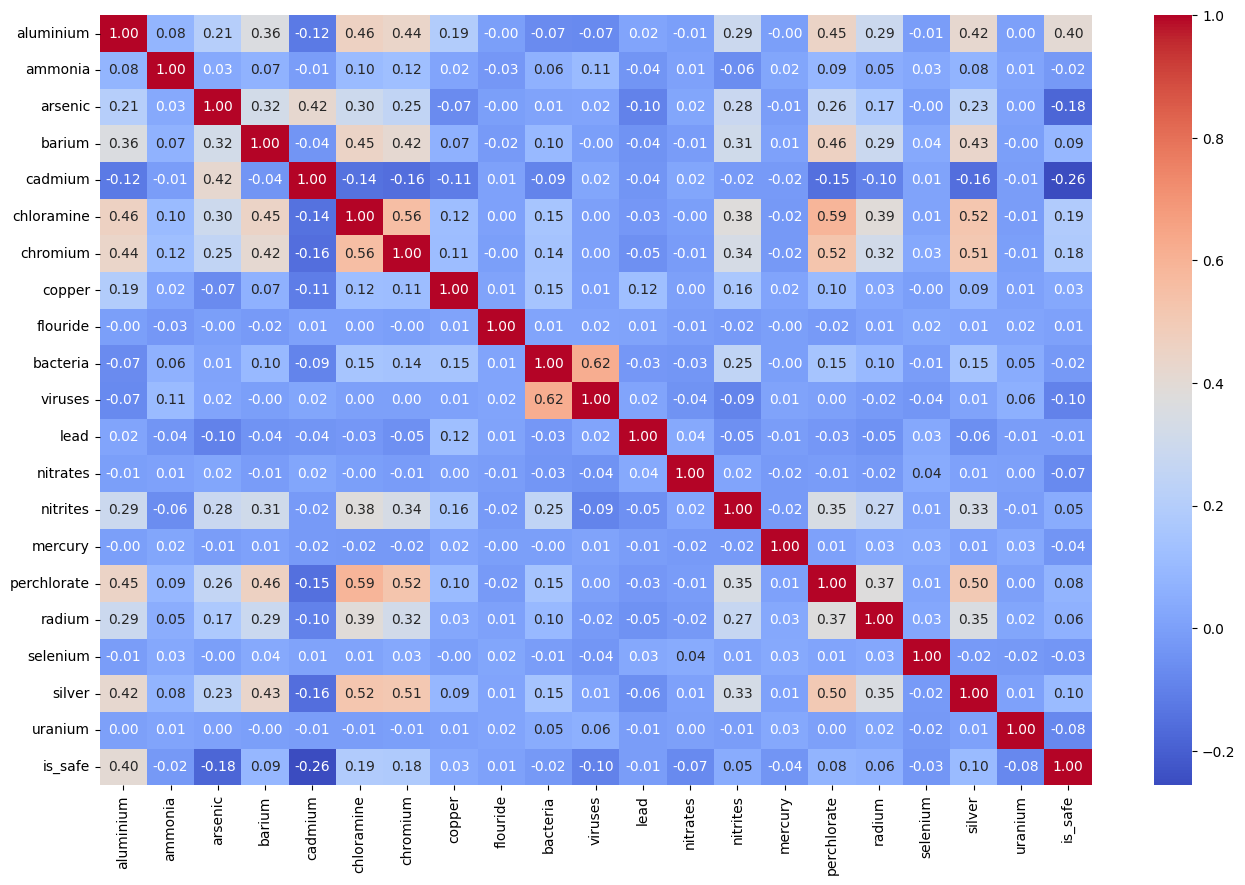

In [ ]:
corr=df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap="coolwarm",fmt=".2f")
plt.show()

From the coorelation graph we can see the some attributes share relationship with the target attribute.
1. aluminum is highly -positive correlated with is_safe column.
2. Cadmium and arsenic are also highly- negatively correlated with target attribute.
3. Almunium is also highly (positively) correlated with chloramine, chromium, perchlorate and silver.

**Checking Data Imbalancing**

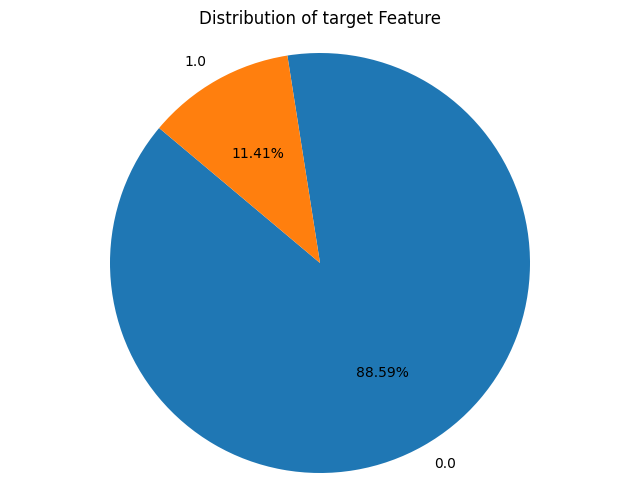

In [ ]:
#checking for imbalanced data
category_counts = df['is_safe'].value_counts()

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Distribution of target Feature')
plt.axis('equal')
plt.show()

From this we can see that our data is imbalanced.
Using resampling technique.

In [ ]:
#oversampling the minority class
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df.drop('is_safe', axis=1), df['is_safe'])
df1 = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
df1.shape

(14168, 21)

## **Model Building**

In [ ]:
X = df1.drop('is_safe', axis=1)
y = df1['is_safe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Logistic Regression**

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)
# Predict on the test set
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
con=confusion_matrix(y_test, y_pred)

Accuracy: 0.8165
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1420
         1.0       0.83      0.79      0.81      1414

    accuracy                           0.82      2834
   macro avg       0.82      0.82      0.82      2834
weighted avg       0.82      0.82      0.82      2834



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluation Metrics:
Accuracy: 0.8165
Precision: 0.8311
Recall: 0.7935
F1 Score: 0.8119


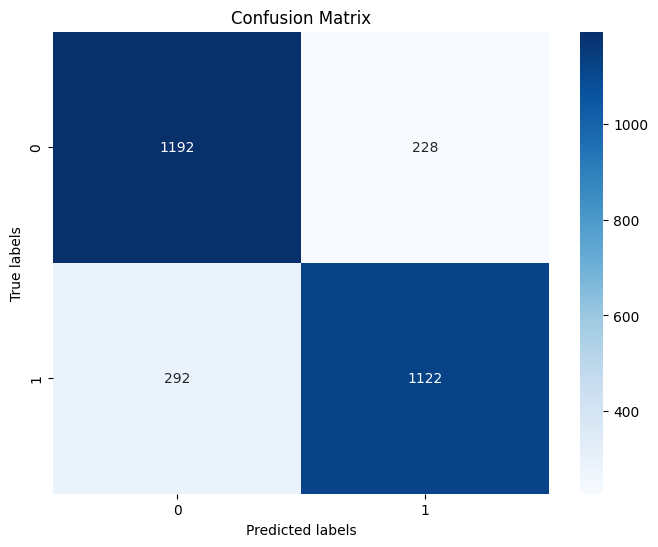

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

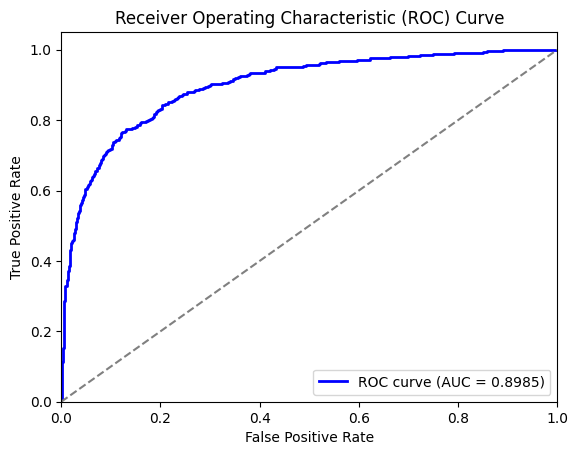

ROC-AUC Score: 0.8985


In [ ]:
# Predict the probabilities for the test set
y_prob = logreg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (is_safe=1)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f'ROC-AUC Score: {roc_auc:.4f}')

### **Hyper-Parameter Turing**

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:

logreg = LogisticRegression(C=100, penalty='l2', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred2 = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
confusion = confusion_matrix(y_test, y_pred2)

# Print the evaluation results
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
confusion = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

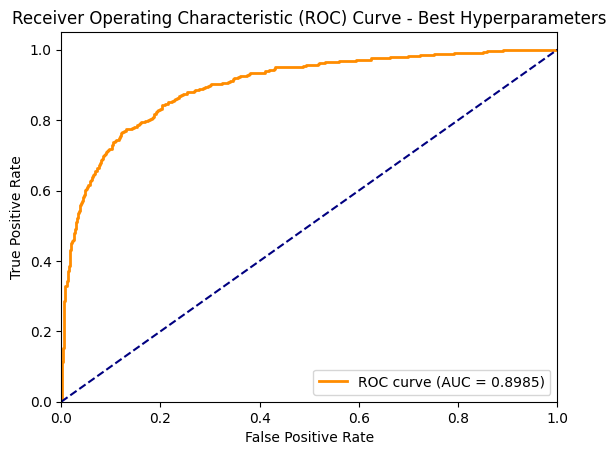

ROC-AUC Score: 0.8985


In [ ]:
y_prob2 = logreg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (is_safe=1)

# ROC curve and AUC score
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob2)
roc_auc2 = roc_auc_score(y_test, y_prob2)

# ROC curve
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc2:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Hyperparameters')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f'ROC-AUC Score: {roc_auc2:.4f}')

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.814205 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


### **Random Forest**

In [ ]:
#random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
#predictnig values
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
confusion = confusion_matrix(y_test, y_pred3)

# Print the evaluation results
print("Evaluation Metrics(Random Forest):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluation Metrics(Random Forest):
Accuracy: 0.9869
Precision: 0.9752
Recall: 0.9993
F1 Score: 0.9871


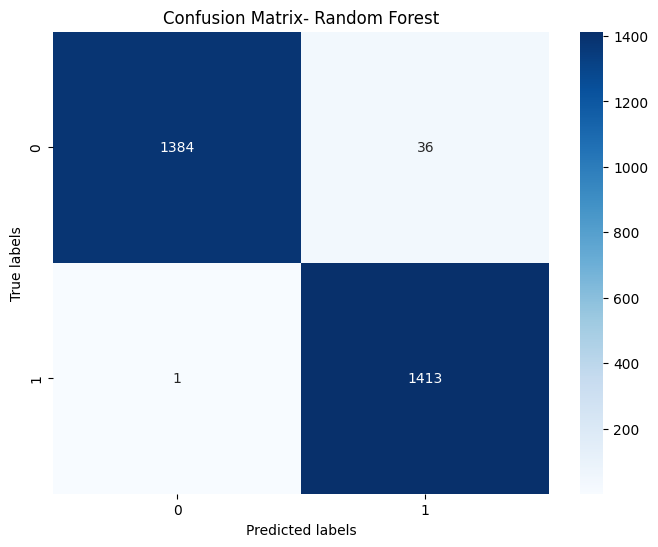

In [ ]:
# confusion matrix
confusion = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix- Random Forest')
plt.show()

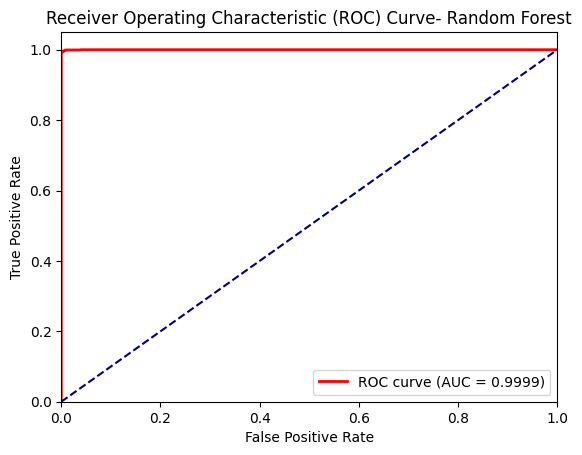

ROC-AUC Score: 0.9999


In [ ]:
y_prob3 = rf.predict_proba(X_test)[:, 1]  # get probabilities for the positive class (is_safe=1)

# Compute ROC curve and AUC score
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_prob3)
roc_auc3 = roc_auc_score(y_test, y_prob3)

# Plot ROC curve
plt.figure()
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc3:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- Random Forest')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f'ROC-AUC Score: {roc_auc3:.4f}')

### **Hypertuning**

In [ ]:
#using Random Hyperparameter Grid
random_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=random_grid,
                               n_iter=100,  # no of param settings that are sampled
                               cv=3,        # 3-fold cross-validation
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)  # use all available cores

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42, verbose=2)

In [ ]:
print("Best Parameters from Randomized Search:", rf_random.best_params_)
y_pred_random = rf_random.predict(X_test)

Best Parameters from Randomized Search: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}


In [ ]:
accuracy = accuracy_score(y_test, y_pred_random)
precision = precision_score(y_test, y_pred_random)
recall = recall_score(y_test, y_pred_random)
f1 = f1_score(y_test, y_pred_random)
confusion = confusion_matrix(y_test, y_pred_random)

# Print the evaluation results
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluation Metrics:
Accuracy: 0.9905
Precision: 0.9839
Recall: 0.9972
F1 Score: 0.9905


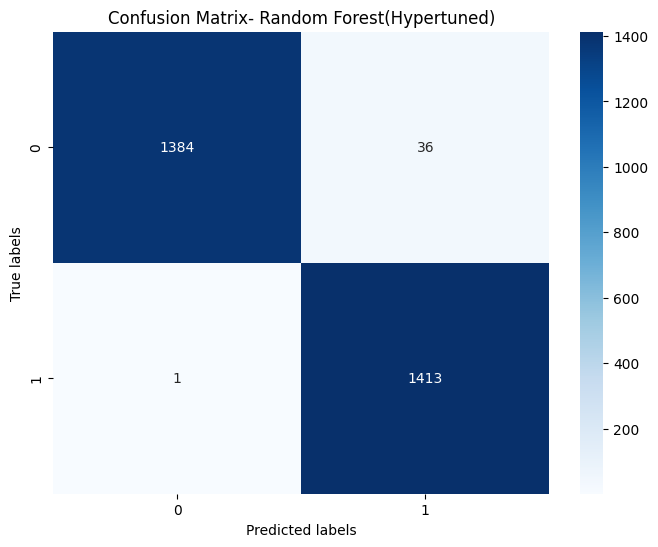

In [ ]:
# confusion matrix
confusion = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix- Random Forest(Hypertuned)')
plt.show()

ROC Curve (Best Random Forest): FPR = [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.04225352e-04
 7.04225352e-04 1.40845070e-03 1.40845070e-03 2

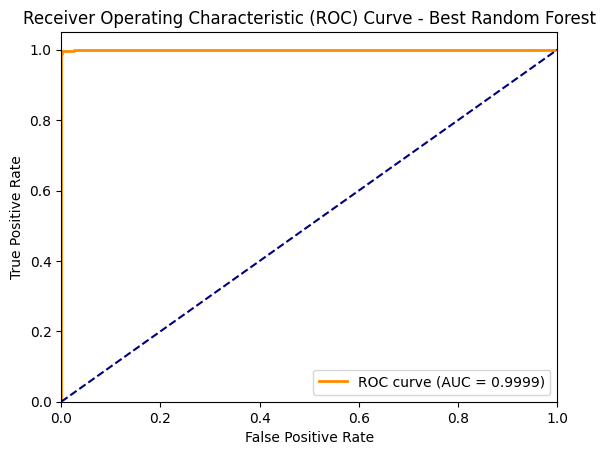

In [ ]:
# Get predicted probabilities for the positive class
y_prob_best_rf = rf_random.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_best_rf, tpr_best_rf, thresholds_best_rf = roc_curve(y_test, y_prob_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_prob_best_rf)

# Print ROC and AUC
print(f"ROC Curve (Best Random Forest): FPR = {fpr_best_rf}, TPR = {tpr_best_rf}")
print(f"AUC (Best Random Forest): {roc_auc_best_rf:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr_best_rf, tpr_best_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_best_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Random Forest')
plt.legend(loc="lower right")
plt.show()

### **Decision Tree**

In [ ]:
# Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# predictions
y_pred = clf.predict(X_test)

In [ ]:
# accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.99
Precision: 0.97
Recall: 1.00
F1-Score: 0.99


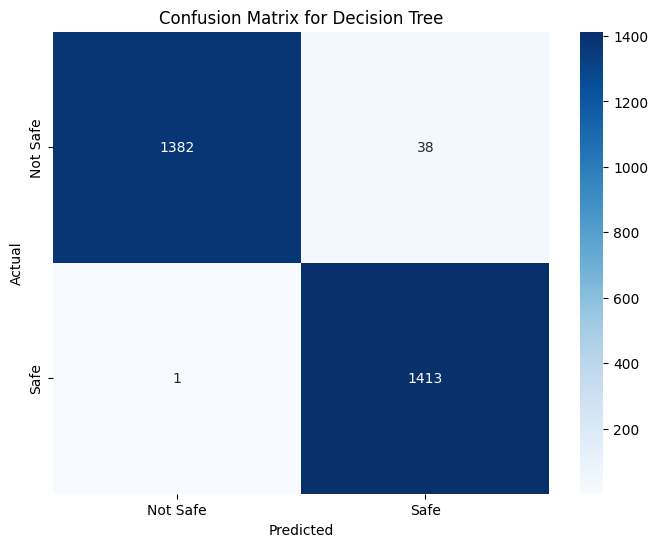

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      1420
         1.0       0.97      1.00      0.99      1414

    accuracy                           0.99      2834
   macro avg       0.99      0.99      0.99      2834
weighted avg       0.99      0.99      0.99      2834



In [ ]:
# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Safe', 'Safe'], yticklabels=['Not Safe', 'Safe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Print classification report for more insights
print(classification_report(y_test, y_pred))

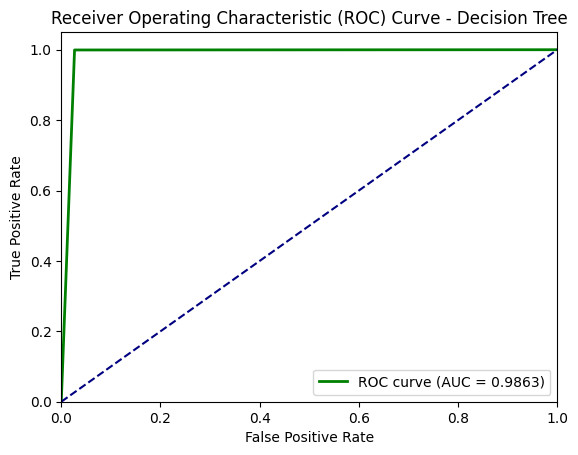

ROC-AUC Score (Decision Tree): 0.9863


In [ ]:
y_prob_dt = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class (is_safe=1)

# Calculate ROC curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f'ROC-AUC Score (Decision Tree): {roc_auc_dt:.4f}')

### **Hypertuning**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10],    # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for best split
}

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1-Score: 0.98


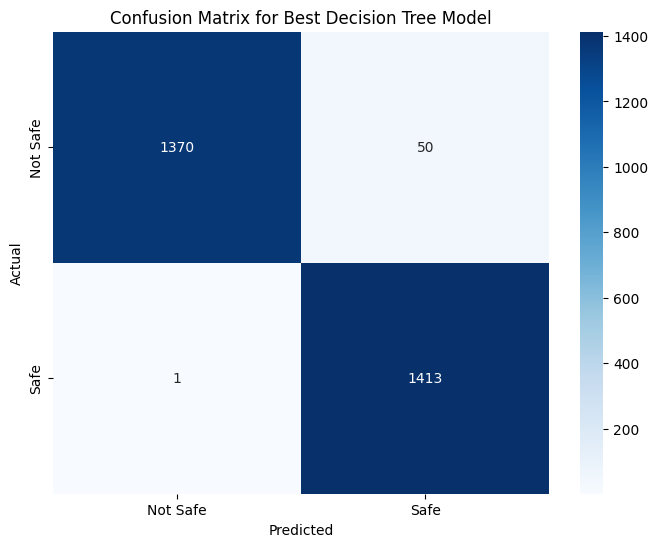

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Safe', 'Safe'], yticklabels=['Not Safe', 'Safe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Decision Tree Model')
plt.show()

ROC Curve (Best Decision Tree): FPR = [0.         0.02464789 0.02816901 0.03028169 0.03380282 0.03521127
 1.        ], TPR = [0.         0.89321075 0.94908062 0.97029703 0.99222065 0.99929279
 1.        ]
AUC (Best Decision Tree): 0.9856


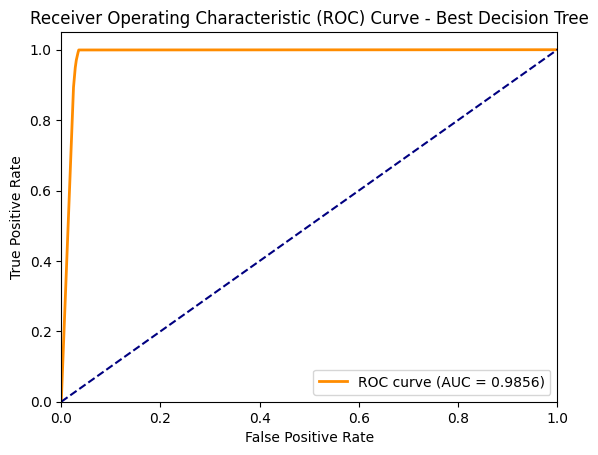

In [ ]:
# Calculate ROC curve and AUC
fpr_best_dt, tpr_best_dt, thresholds_best_dt = roc_curve(y_test, y_prob_best_dt)
roc_auc_best_dt = roc_auc_score(y_test, y_prob_best_dt)

# Print ROC and AUC
print(f"ROC Curve (Best Decision Tree): FPR = {fpr_best_dt}, TPR = {tpr_best_dt}")
print(f"AUC (Best Decision Tree): {roc_auc_best_dt:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr_best_dt, tpr_best_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_best_dt:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Decision Tree')
plt.legend(loc="lower right")
plt.show()

Model Comparison

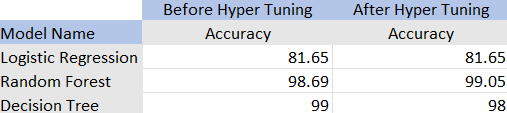